# Zadanie 4 - Zrozumienie i analiza zbioru danych

Wykonanie zadania rozpoczniemy od zaimportowania bibliotek, które będą nam potrzebne do analizy zbioru danych.

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

## Pobranie zbioru danych Titanic

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

## Opis danych, rozkład cech kluczowych oraz wyszukanie brakujących wartości

In [21]:

print(df.head())
print(df.info())

df.describe()

print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Po analizie widać że w tabelach wiek, kabina oraz port zaokrętowania występują brakujące wartości. W celu prawidłowej analizy, wypełnimy te wartości danymi pomocniczymi. Dla wieku zostanie wykorzystana mediana, dla kabiny oraz portu zaokrętowania wartość 'unknown'.

## Modyfikacja zbioru danych
Z tabeli Name zostaną wydobyte tytuły pasażerów, które mogą być przydatne w dalszej analizie, między innymi w celu określenia płci.

In [22]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

## Uzupełnienie zbioru danych
Brakujące dane zostaną uzupełnione, wiek zostanie uzupełniony medianą, a port zaokrętowania oraz kabina wartością 'unknown'.
Niektóre cechy są w formie tekstowej, co uniemożliwia ich wykorzystanie w modelu. W celu uzupełnienia zbioru danych, zamienimy cechy tekstowe na numeryczne.
Pozostałe dane tekstowe zostaną usunięte, ponieważ nie wpłyną na wynik modelu.

In [23]:
imputer = SimpleImputer(strategy="median")
df["Age"] = imputer.fit_transform(df["Age"].values.reshape(-1, 1))
df["Cabin"].fillna(df['Cabin'].mode()[0], inplace = True)
df["Embarked"].fillna(df['Embarked'].mode()[0], inplace = True)

df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df['Title'] = df['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
df['Title'] = df['Title'].fillna(0)
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

df = df.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)

C:\Users\paryz\AppData\Local\Temp\ipykernel_8348\1236046496.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cabin"].fillna(df['Cabin'].mode()[0], inplace = True)
C:\Users\paryz\AppData\Local\Temp\ipykernel_8348\1236046496.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



## Analiza korelacji między cechami, a przetrwaniem

In [24]:
corr_matrix = df.corr()
print(corr_matrix["Survived"].sort_values(ascending=False))

Survived    1.000000
Sex         0.543351
Title       0.407753
Fare        0.257307
Embarked    0.106811
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Pclass     -0.338481
Name: Survived, dtype: float64


# Wykres korelacji
Aby zrozumieć zależności między danymi, wygenerujemy wykres korelacji.

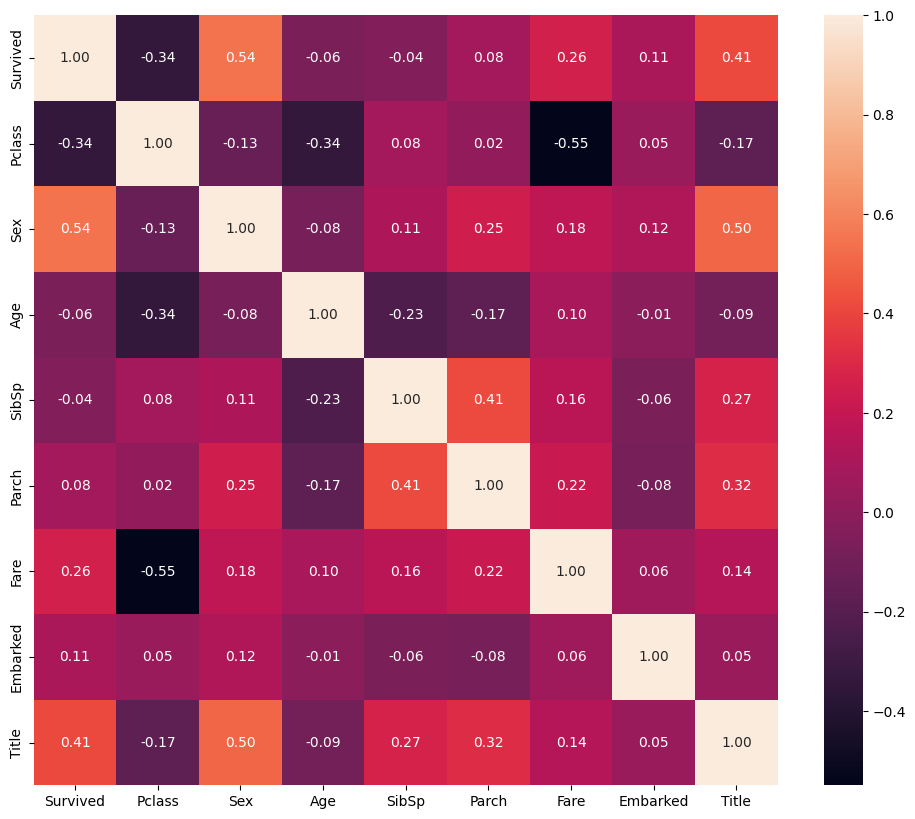

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

Z wykresu wynika że największą korelację z przetrwaniem mają płeć, klasa oraz opłata za bilet.
## Podział danych na zbiory treningowy i testowy
Przygotujmy zbiór danych do uczenia maszynowego. Podzielmy zbiór danych na zbiór treningowy i testowy.

In [26]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# Zadanie 5 - Projektowanie modelu sieci neuronowej

Mając już podzielony zbiór danych na zbiór treningowy i testowy, możemy przystąpić do projektowania modelu sieci neuronowej.
Dodajmy potrzebne biblioteki.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

## Przygotowanie danych

In [28]:
X_train = train_set.drop("Survived", axis=1)
Y_train = train_set["Survived"]
X_test  = test_set.drop("Survived", axis=1)
Y_test = test_set["Survived"]

## Projektowanie i szkolenie modelu sieci neuronowej

In [29]:
model = RandomForestClassifier()

model.fit(X_train, Y_train)

RandomForestClassifier()

## Optymalizacja i dostrojenie modelu

In [30]:
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid.fit(X_train, Y_train)

## Ocena modelu

In [31]:
Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))

Accuracy: 0.8324022346368715
Precision: 0.7972972972972973
Recall: 0.7972972972972973


## Analiza błędów i interpretacja wyników

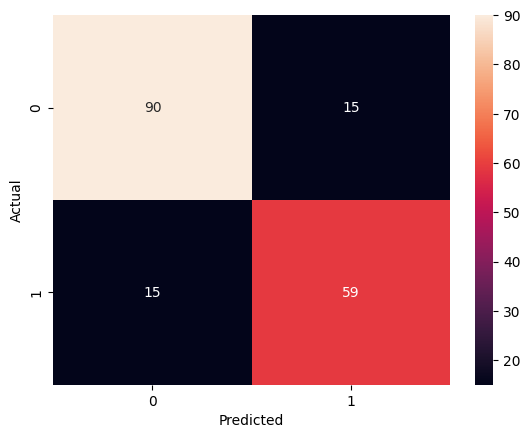

In [32]:
confusion_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Podsumowanie
Model sieci neuronowej osiągnął skuteczność na poziomie 83%. Warto zauważyć, że model osiągnął lepsze wyniki dla kobiet, niż dla mężczyzn.